In [ ]:
%cd /home/andreasstillits/coding/Leaves1D/supplementary

from codebase.utils.plotfunctions import show_mesh 

# show_mesh("files/meshes/cylinder_low.msh")

/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW


/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW


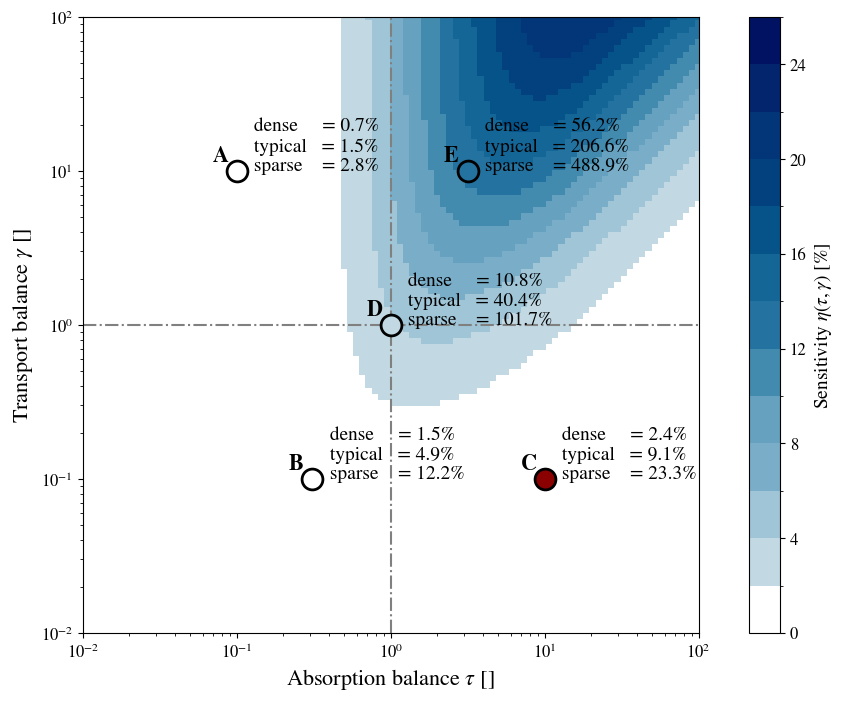

In [ ]:
%cd /home/andreasstillits/coding/Leaves1D/supplementary

import numpy as np 
import matplotlib.pyplot as plt 
from codebase.utils.plotfunctions import plot_sensitivity_map, get_blue_cmap
from codebase.utils.constants import ThreeDimExploration, Cases
constants = ThreeDimExploration()

def get_rel_diff_for_case(case: str) -> None:
    rel_diffs = []
    versions = ["low", "typical", "high"]
    for version in versions:
        filename = constants.get_base_path(version) / f"solution{case}_summary.txt"
        
        data = np.loadtxt(filename, skiprows=1, delimiter=";")
        rel_diffs.append(data[2])  # Assuming the 2th column contains the relative differences
    return rel_diffs


def plot_threedim_comparison_map():
    fig, ax = plt.subplots(figsize=(13, 8))
    im = plot_sensitivity_map("files/nonlinear_sensitivities/sensitivities_mu0.00_.txt", ax=ax)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(r'Sensitivity $\eta(\tau, \gamma)$ [%]')
    ax.set_xlabel(r'Absorption balance $\tau$ []', fontsize=16)
    ax.set_ylabel(r'Transport balance $\gamma$ []', fontsize=16)
    # place circles for cases A - E
    cases = Cases()
    labels = ["A", "B", "C", "D", "E"]
    circles = []
    for label in labels:
        tau, gamma, chi_ = cases.get_case_params(label)
        circles.append((tau, gamma))
    # plot circles
    cmap, norm = get_blue_cmap((0, 26, 14))
    colors = ['white', 'white', 'darkred', cmap(norm(3)), cmap(norm(12))]
    for label, color, (tau, gamma) in zip(labels, colors, circles):
        ax.plot(tau, gamma, marker='o', markersize=15, markeredgecolor='black', markeredgewidth=2, markerfacecolor=color)
        ax.text(tau*0.70, gamma*1.15, label, color='black', fontsize=16, fontweight='bold')
    
    def _assign_info(case: str, loc: list[float] = [1.20, 1.0]) -> None:
        tau, gamma, chi_ = cases.get_case_params(case)
        low_, typical_, high_ = get_rel_diff_for_case(case)
        ax.text(tau*loc[0], gamma*loc[1], f' dense     = {100*low_:.1f}% \n typical   = {100*typical_:.1f}% \n sparse    = {100*high_:.1f}%', color='black', fontsize=14)

    _assign_info("A")
    _assign_info("B")
    _assign_info("C")
    _assign_info("D")
    _assign_info("E")
    plt.show()

plot_threedim_comparison_map()

/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW


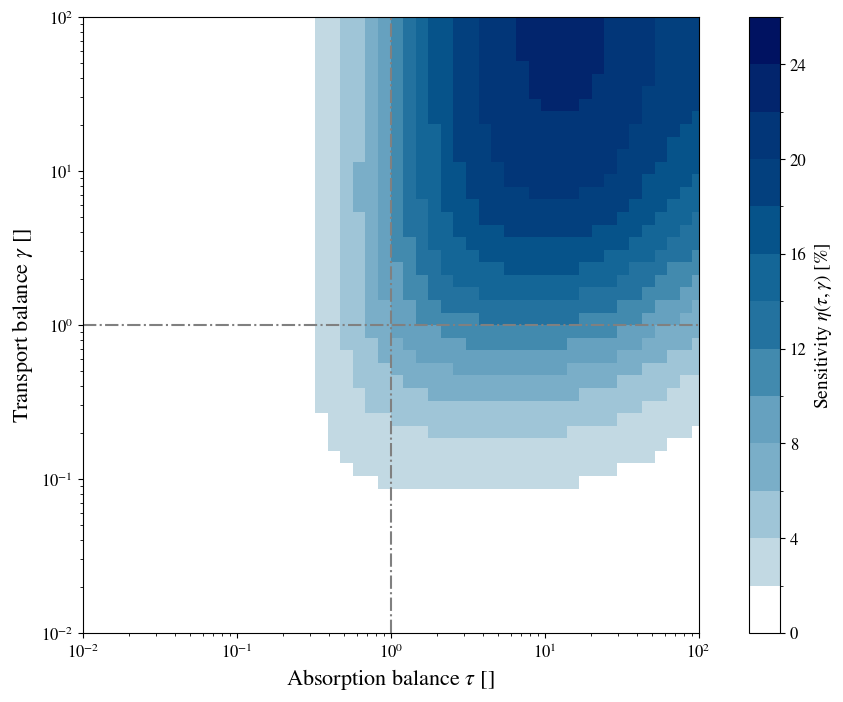

In [ ]:
%cd /home/andreasstillits/coding/Leaves1D/supplementary

import numpy as np 
import matplotlib.pyplot as plt 
from codebase.utils.plotfunctions import plot_sensitivity_map, get_blue_cmap

def plot_threedim_sensitivity_map(rhomax: float = 0.2):
    fig, ax = plt.subplots(figsize=(13, 8))
    im = plot_sensitivity_map(f"files/lateral_scanning/rhomax_{rhomax:.1f}_/3d_sensitivities.txt", ax=ax)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(r'Sensitivity $\eta(\tau, \gamma)$ [%]')
    ax.set_xlabel(r'Absorption balance $\tau$ []', fontsize=16)
    ax.set_ylabel(r'Transport balance $\gamma$ []', fontsize=16)
    plt.show()

plot_threedim_sensitivity_map(rhomax = 0.3)